In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mid_simulations.simulation_funcs import (
    est_eff_vif_all_subs,
)


In [2]:
# Change this to the path where you want to save the output figures
figure_output_path = (
    '/Users/jeanettemumford/Dropbox/Research/Projects/russ/MID_paper_figures_revision'
)
# Change this to AHRB if you're using the AHRB data (distributed with this repo)
dataset = 'ABCD'

# VIFs/efficiency

In [3]:
vif_eff_no_jitter = est_eff_vif_all_subs(
    oversampling=50, tr=0.8, dataset=dataset, include_hp_filter=True
)

In [4]:
# oversampling=50, tr=.8, previously 5 and 1
vif_eff_yes_jitter = est_eff_vif_all_subs(
    oversampling=50,
    tr=0.8,
    jitter=True,
    jitter_iti_min=2,
    jitter_iti_max=6,
    dataset=dataset,
    include_hp_filter=True,
)

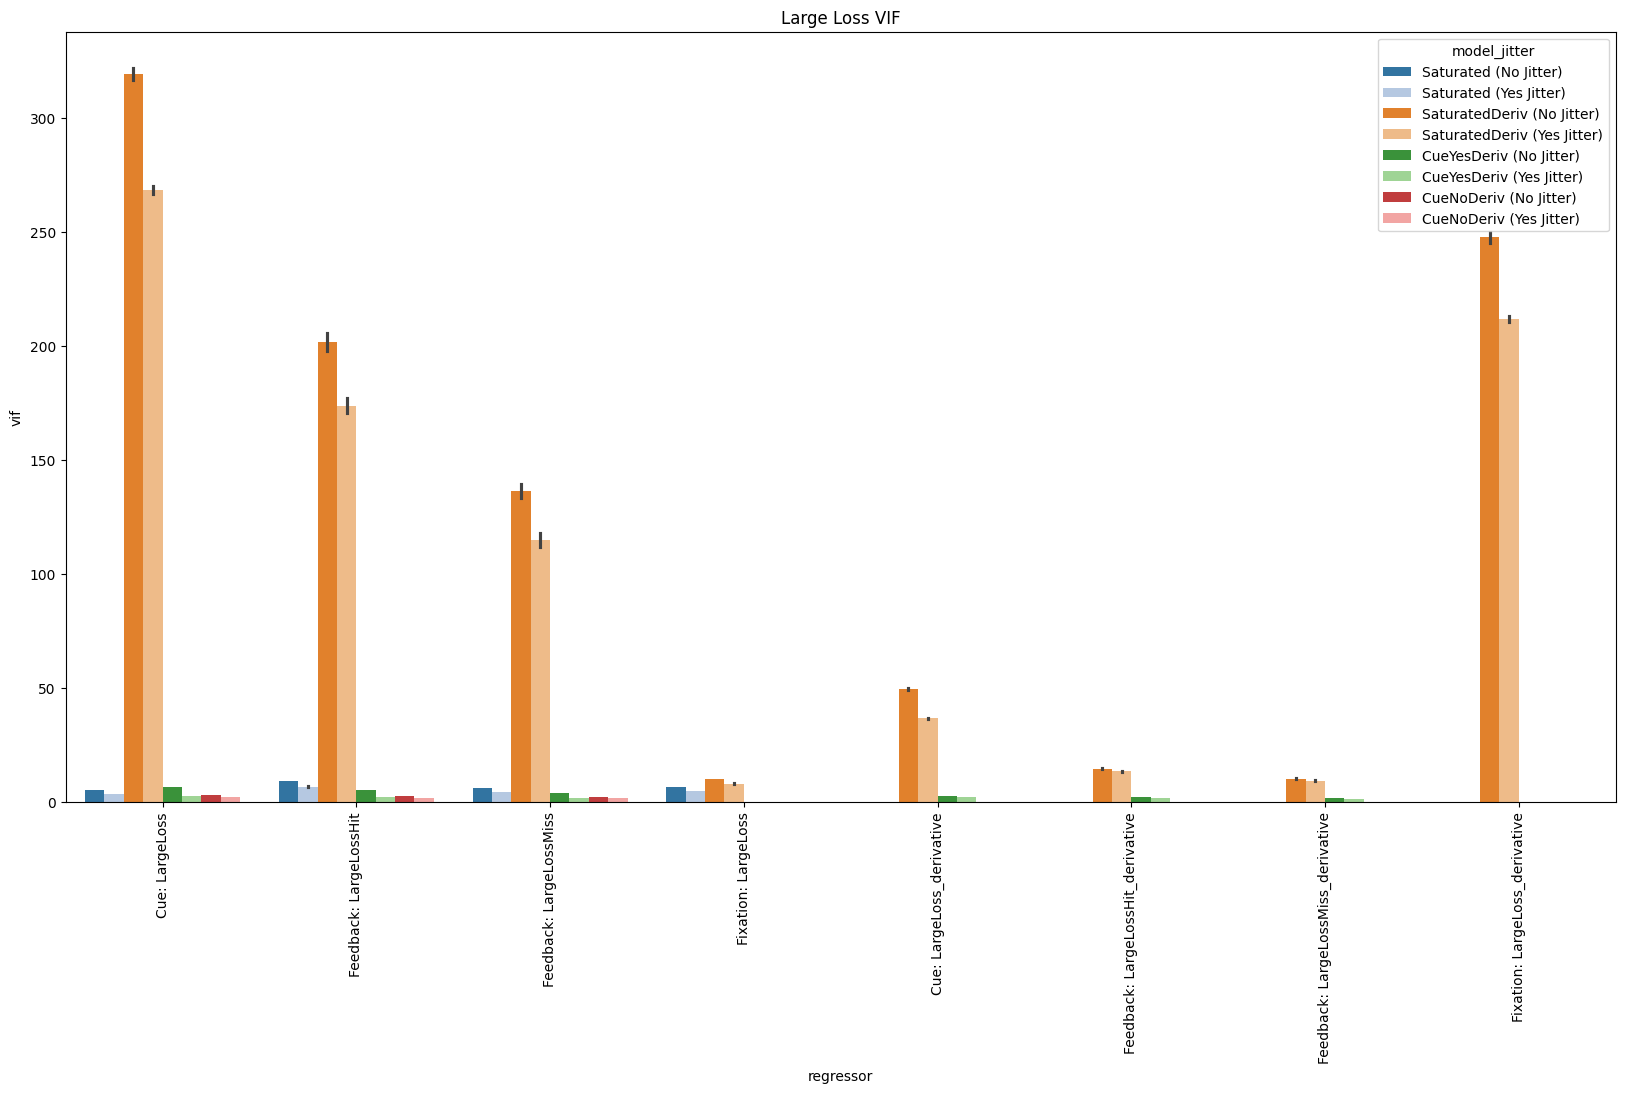

In [5]:
vif_eff_no_jitter['vifs']['Jitter'] = 'No Jitter'
vif_eff_yes_jitter['vifs']['Jitter'] = 'Yes Jitter'
vif_dat_plot = pd.concat([vif_eff_no_jitter['vifs'], vif_eff_yes_jitter['vifs']])

vif_dat_plot['model_jitter'] = (
    vif_dat_plot['model'] + ' (' + vif_dat_plot['Jitter'] + ')'
)
# sufficient to just look at LargeLoss
vif_dat_large_loss = vif_dat_plot[vif_dat_plot['regressor'].str.contains('LargeLoss')]
fig = plt.subplots(1, 1, figsize=(20, 10))
hue_order = [
    f'{model} {jitter_type}'
    for model in ['Saturated', 'SaturatedDeriv', 'CueYesDeriv', 'CueNoDeriv']
    for jitter_type in ['(No Jitter)', '(Yes Jitter)']
]
sns.barplot(
    data=vif_dat_large_loss,
    x='regressor',
    y='vif',
    hue='model_jitter',
    hue_order=hue_order,
    palette='tab20',
)
plt.tick_params(axis='x', rotation=90)
plt.title('Large Loss VIF')
plt.show()

2.347480715992911
446.80487112717236
128.4348389673441


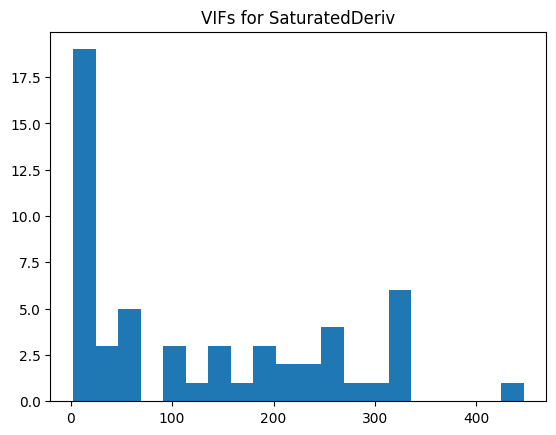

36
(55,)


In [6]:
vif_dat_plot
vif_avg_saturated_deriv = (
    vif_dat_plot[
        (vif_dat_plot['model'] == 'SaturatedDeriv')
        & (vif_dat_plot['Jitter'] == 'No Jitter')
    ]
    .groupby('regressor')['vif']
    .mean()
)
print(vif_avg_saturated_deriv.min())
print(vif_avg_saturated_deriv.max())
print(vif_avg_saturated_deriv.mean())


plt.hist(vif_avg_saturated_deriv, 20)
plt.title('VIFs for SaturatedDeriv')
plt.show()

print(np.sum(vif_avg_saturated_deriv > 20))
print(vif_avg_saturated_deriv.shape)

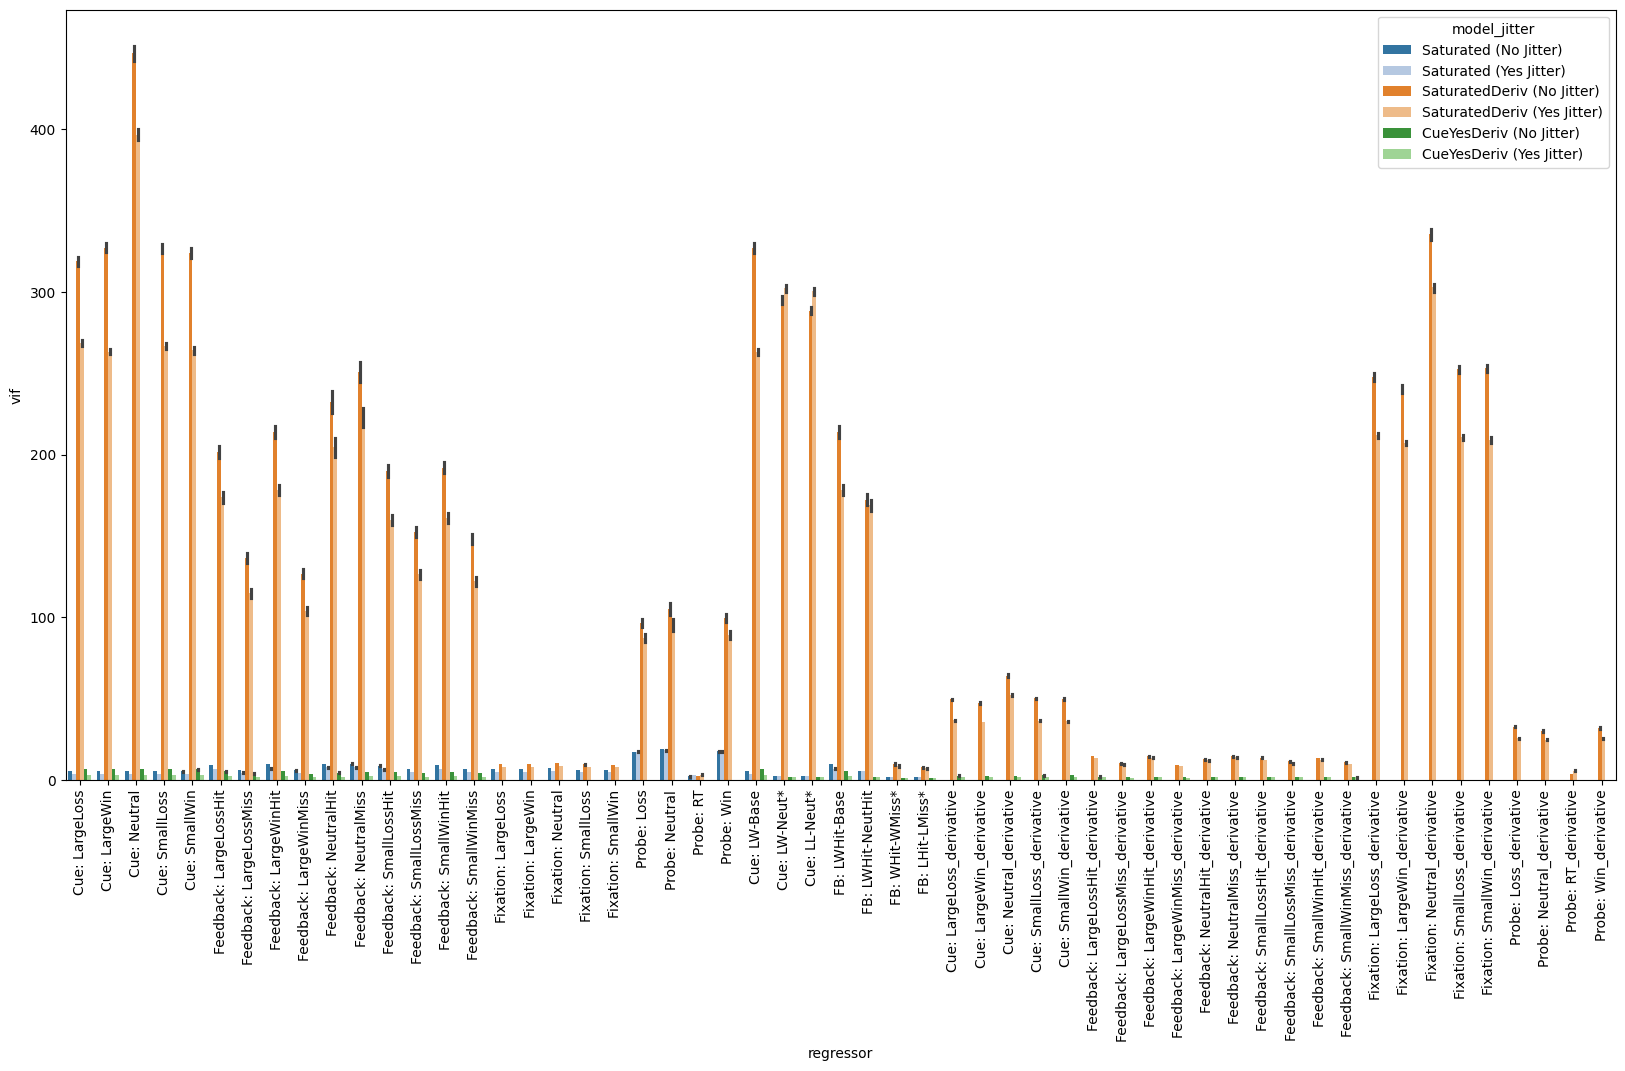

In [7]:
# Too messy with everything?
vif_trimmed = vif_dat_plot[
    ~vif_dat_plot['regressor'].str.contains('Derivative|constant')
]
vif_trimmed = vif_trimmed[~vif_trimmed['model'].str.contains('CueNoDeriv')]
fig = plt.subplots(1, 1, figsize=(20, 10))
hue_order = [
    f'{model} {jitter_type}'
    for model in ['Saturated', 'SaturatedDeriv', 'CueYesDeriv']
    for jitter_type in ['(No Jitter)', '(Yes Jitter)']
]
sns.barplot(
    data=vif_trimmed,
    x='regressor',
    y='vif',
    hue='model_jitter',
    hue_order=hue_order,
    palette='tab20',
)
plt.tick_params(axis='x', rotation=90)
# plt.title('Large Loss VIF')
plt.show()

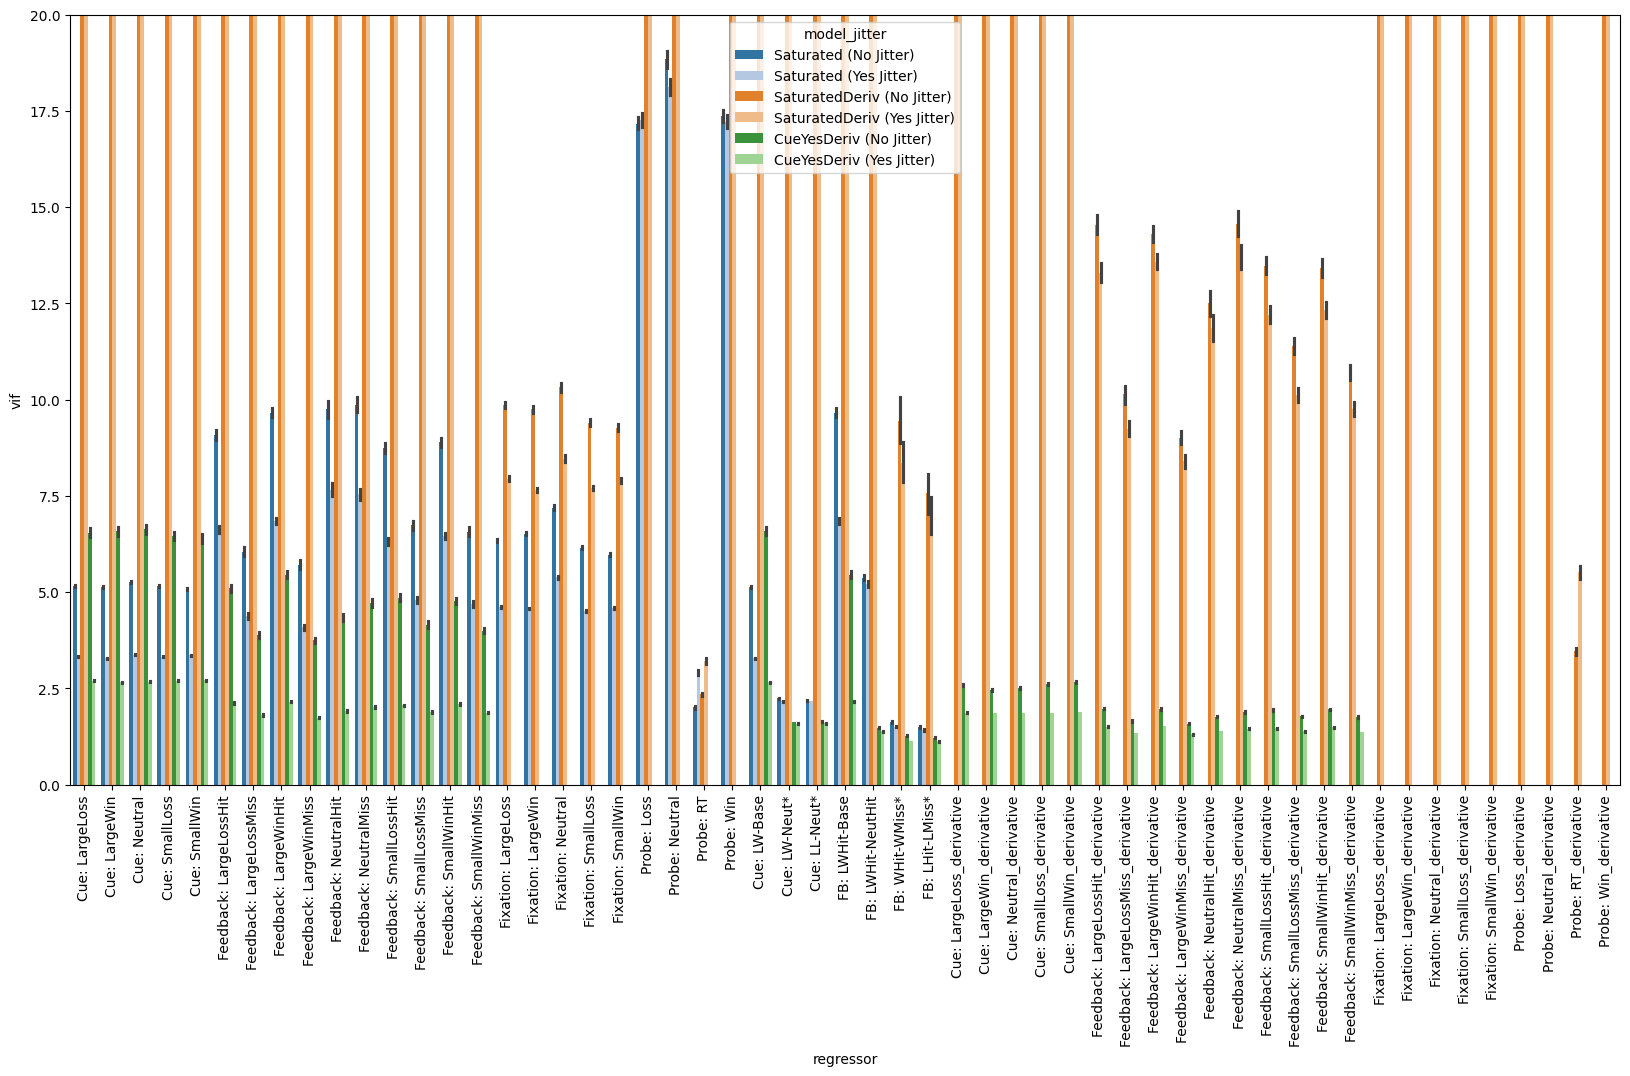

In [8]:
# Change Ylim
vif_trimmed = vif_dat_plot[
    ~vif_dat_plot['regressor'].str.contains('Derivative|constant')
]
vif_trimmed = vif_trimmed[~vif_trimmed['model'].str.contains('CueNoDeriv')]
fig = plt.subplots(1, 1, figsize=(20, 10))
hue_order = [
    f'{model} {jitter_type}'
    for model in ['Saturated', 'SaturatedDeriv', 'CueYesDeriv']
    for jitter_type in ['(No Jitter)', '(Yes Jitter)']
]
sns.barplot(
    data=vif_trimmed,
    x='regressor',
    y='vif',
    hue='model_jitter',
    hue_order=hue_order,
    palette='tab20',
)
plt.tick_params(axis='x', rotation=90)
plt.ylim(0, 20)
# plt.title('Large Loss VIF')
plt.show()

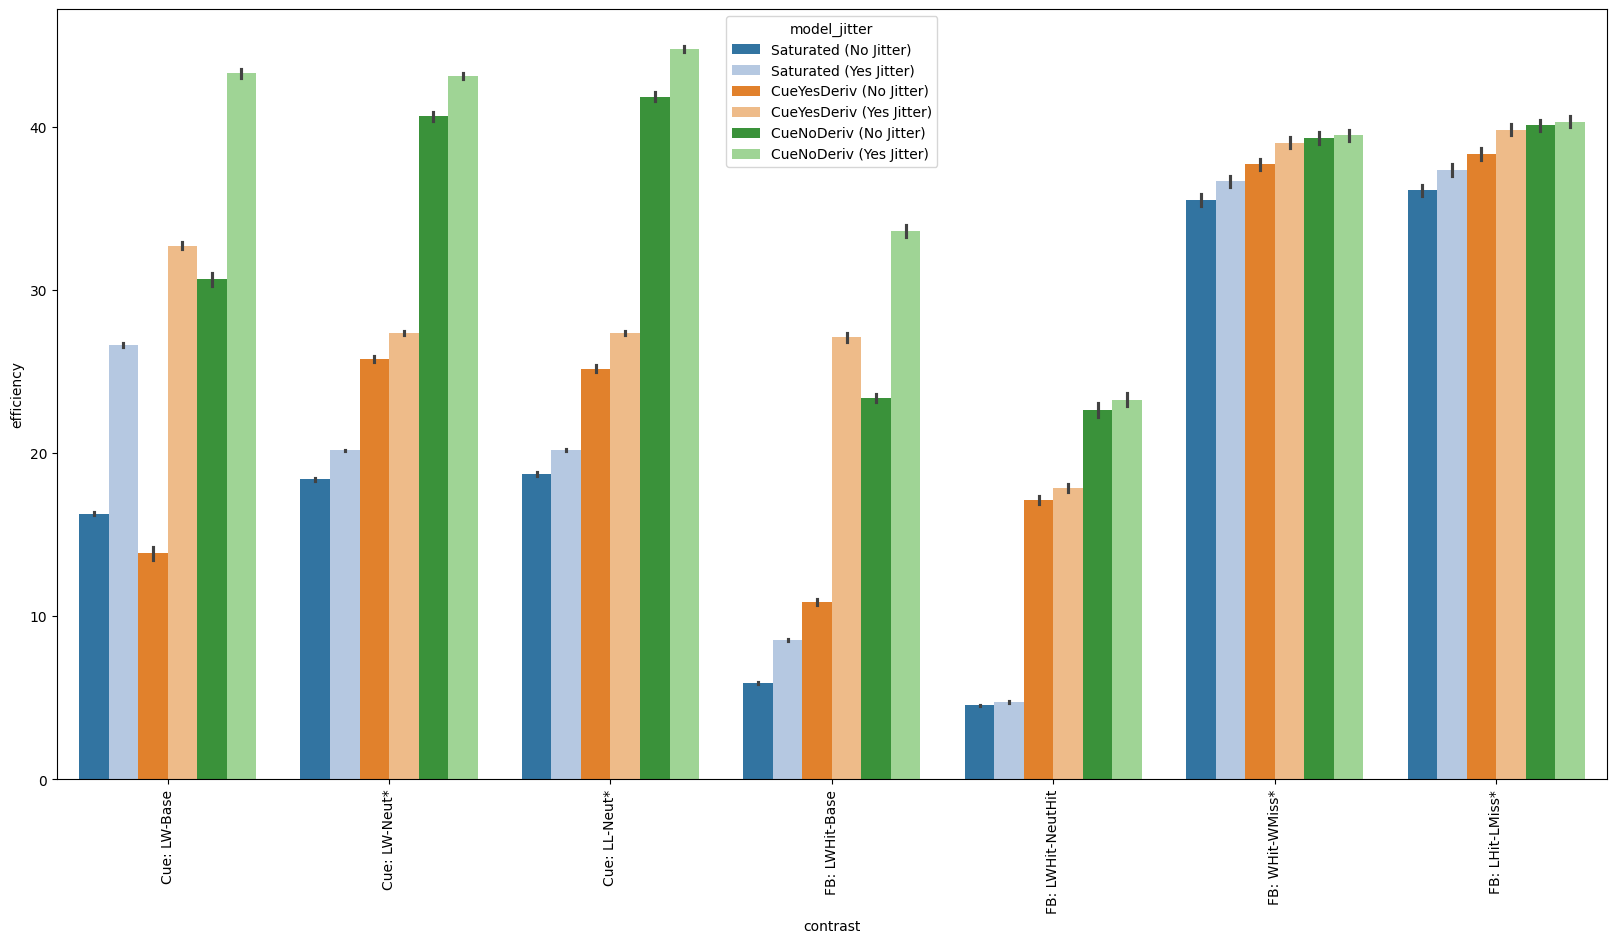

In [9]:
vif_eff_no_jitter['efficiencies']['Jitter'] = 'No Jitter'
vif_eff_yes_jitter['efficiencies']['Jitter'] = 'Yes Jitter'
eff_dat_plot = pd.concat(
    [vif_eff_no_jitter['efficiencies'], vif_eff_yes_jitter['efficiencies']]
)
eff_dat_plot['model_jitter'] = (
    eff_dat_plot['model'] + ' (' + eff_dat_plot['Jitter'] + ')'
)

eff_dat_no_cue_fix = eff_dat_plot
eff_dat_no_cue_fix_contrasts = eff_dat_no_cue_fix[
    eff_dat_no_cue_fix['contrast'].str.contains('-')
]

hue_order = [
    f'{model} {jitter_type}'
    for model in ['Saturated', 'CueYesDeriv', 'CueNoDeriv']
    for jitter_type in ['(No Jitter)', '(Yes Jitter)']
]

fig = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(
    data=eff_dat_no_cue_fix_contrasts,
    x='contrast',
    y='efficiency',
    hue='model_jitter',
    hue_order=hue_order,
    palette='tab20',
)
# plt.ylim(0,.01)
plt.tick_params(axis='x', rotation=90)
plt.show()

### Figures with the two models used in the manuscript

In [10]:
def contrast_sort_key(label):
    # Check if it's a contrast (contains '-')
    is_contrast = '-' in label

    # Main group: 0 = not a contrast, 1 = contrast
    main_group = 1 if is_contrast else 0

    # Subgroup for non-contrast
    if not is_contrast:
        if label.startswith('Cue:'):
            sub_group = 0
        elif label.startswith('Fixation:'):
            sub_group = 1
        elif label.startswith('Probe:'):
            # Push "Probe: RT" to end of Probe group
            sub_group = 2.9 if label == 'Probe: RT' else 2
        elif label.startswith('Feedback:') or label.startswith('FB:'):
            sub_group = 3
        else:
            sub_group = 4  # fallback
        star_priority = 1 if '*' in label else 0
        return (main_group, sub_group, star_priority, label)

    # Subgroup for contrasts (with '-')
    else:
        if label.startswith('Cue:'):
            sub_group = 0
        elif label.startswith('FB:') or label.startswith('Feedback:'):
            sub_group = 1
        else:
            sub_group = 2  # fallback
        star_priority = 1 if '*' in label else 0
        return (main_group, sub_group, star_priority, label)


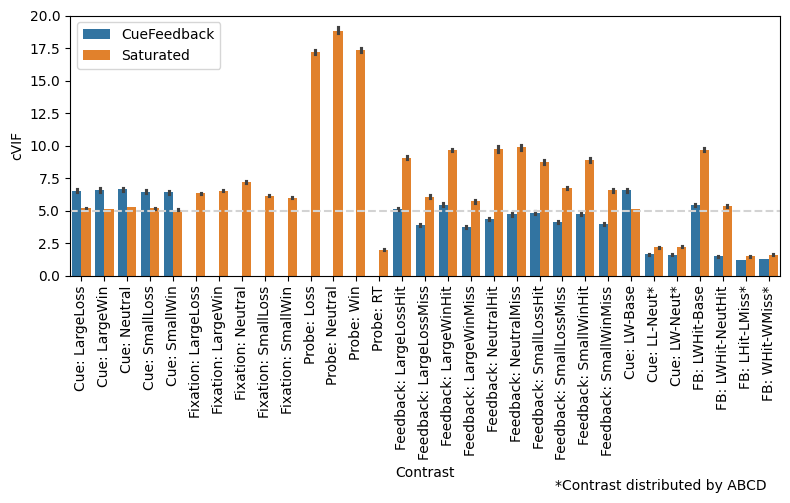

In [11]:
fig_path = f'{figure_output_path}/vif_barplot.pdf'

vif_trimmed = vif_dat_plot[
    ~vif_dat_plot['regressor'].str.contains('constant|derivative')
]
vif_trimmed = vif_trimmed[~vif_trimmed['model'].str.contains('CueNoDeriv')]
vif_trimmed = vif_trimmed[vif_trimmed['Jitter'] == 'No Jitter']
vif_trimmed['model'] = vif_trimmed['model'].str.replace('CueYesDeriv', 'CueFeedback')
vif_trimmed = vif_trimmed.rename(
    {'model': 'Model', 'vif': 'cVIF', 'regressor': 'Contrast'}, axis=1
)

vif_trimmed_not_cons = vif_trimmed[~vif_trimmed['Contrast'].str.contains('-')]

vif_trimmed_cons = vif_trimmed[vif_trimmed['Contrast'].str.contains('-')]
vif_trimmed_cons = vif_trimmed_cons.sort_values(by='Contrast')
vif_plot = pd.concat([vif_trimmed_not_cons, vif_trimmed_cons])

all_contrasts = vif_plot['Contrast'].unique()
custom_contrast_order = sorted(all_contrasts, key=contrast_sort_key)

fig = plt.subplots(1, 1, figsize=(8, 5))
hue_order = [f'{model}' for model in ['CueFeedback', 'Saturated']]
sns.barplot(
    data=vif_plot,
    x='Contrast',
    y='cVIF',
    hue='Model',
    hue_order=hue_order,
    order=custom_contrast_order,
)
plt.axhline(y=5, color='lightgray', linestyle='--')
plt.legend(loc='upper left')
plt.tick_params(axis='x', rotation=90)
plt.ylim(0, 20)
plt.figtext(0.7, 0.01, '*Contrast distributed by ABCD', ha='left', fontsize=10)
plt.tight_layout()
plt.savefig(fig_path)
plt.show()

In [12]:
vif_plot

,Contrast,cVIF,Model,Jitter,model_jitter
0,Cue: LargeLoss,5.878434,Saturated,No Jitter,Saturated (No Jitter)
1,Cue: LargeLoss,4.621643,Saturated,No Jitter,Saturated (No Jitter)
2,Cue: LargeLoss,5.515915,Saturated,No Jitter,Saturated (No Jitter)
3,Cue: LargeLoss,4.735427,Saturated,No Jitter,Saturated (No Jitter)
4,Cue: LargeLoss,5.353088,Saturated,No Jitter,Saturated (No Jitter)
...,...,...,...,...,...
26501,FB: WHit-WMiss*,15.403910,SaturatedDeriv,No Jitter,SaturatedDeriv (No Jitter)
26502,FB: WHit-WMiss*,4.113354,SaturatedDeriv,No Jitter,SaturatedDeriv (No Jitter)
26503,FB: WHit-WMiss*,3.612627,SaturatedDeriv,No Jitter,SaturatedDeriv (No Jitter)
17502,FB: WHit-WMiss*,1.076393,CueFeedback,No Jitter,CueYesDeriv (No Jitter)


In [13]:
vif_plot['Contrast'].unique()
# FB: WHit-WMiss*, 'Feedback: LargeWinHit', 'Feedback: SmallWinHit', 'Feedback: LargeWinHit', 'Feedback: SmallWinHit'
# Saturated


array(['Cue: LargeLoss', 'Cue: LargeWin', 'Cue: Neutral',
       'Cue: SmallLoss', 'Cue: SmallWin', 'Feedback: LargeLossHit',
       'Feedback: LargeLossMiss', 'Feedback: LargeWinHit',
       'Feedback: LargeWinMiss', 'Feedback: NeutralHit',
       'Feedback: NeutralMiss', 'Feedback: SmallLossHit',
       'Feedback: SmallLossMiss', 'Feedback: SmallWinHit',
       'Feedback: SmallWinMiss', 'Fixation: LargeLoss',
       'Fixation: LargeWin', 'Fixation: Neutral', 'Fixation: SmallLoss',
       'Fixation: SmallWin', 'Probe: Loss', 'Probe: Neutral', 'Probe: RT',
       'Probe: Win', 'Cue: LL-Neut*', 'Cue: LW-Base', 'Cue: LW-Neut*',
       'FB: LHit-LMiss*', 'FB: LWHit-Base', 'FB: LWHit-NeutHit',
       'FB: WHit-WMiss*'], dtype=object)

In [14]:
vif_cond_comparisons = vif_plot.copy()
vif_cond_comparisons['Contrast'] = vif_cond_comparisons['Contrast'].astype(str)
vif_cond_comparisons = vif_cond_comparisons[
    vif_cond_comparisons['Contrast'].str.contains(
        'FB: WHit-WMiss*|Feedback: LargeWinHit|Feedback: SmallWinHit|Feedback: LargeWinMiss|Feedback: SmallWinMiss'
    )
]
vif_cond_comparisons = vif_cond_comparisons[
    vif_cond_comparisons['Model'] == 'Saturated'
]
print(vif_cond_comparisons.shape)
print(vif_cond_comparisons['Contrast'].unique())

(2500, 5)
['Feedback: LargeWinHit' 'Feedback: LargeWinMiss' 'Feedback: SmallWinHit'
 'Feedback: SmallWinMiss' 'FB: WHit-WMiss*']


In [15]:
import colorsys

import matplotlib.colors as mcolors


def brighten_hex(hex_color, factor=1.2):
    rgb = mcolors.hex2color(hex_color)  # tuple float 0-1
    h, l, s = colorsys.rgb_to_hls(*rgb)
    l = min(1, l * factor)  # brighten lightness
    new_rgb = colorsys.hls_to_rgb(h, l, s)
    return mcolors.to_hex(new_rgb)


brighter_cVIF = brighten_hex('#D19425', 1.05)
brighter_tVIF = brighten_hex('#5E7044', 1.05)
print(brighter_cVIF, brighter_tVIF)

#d99b29 #637647


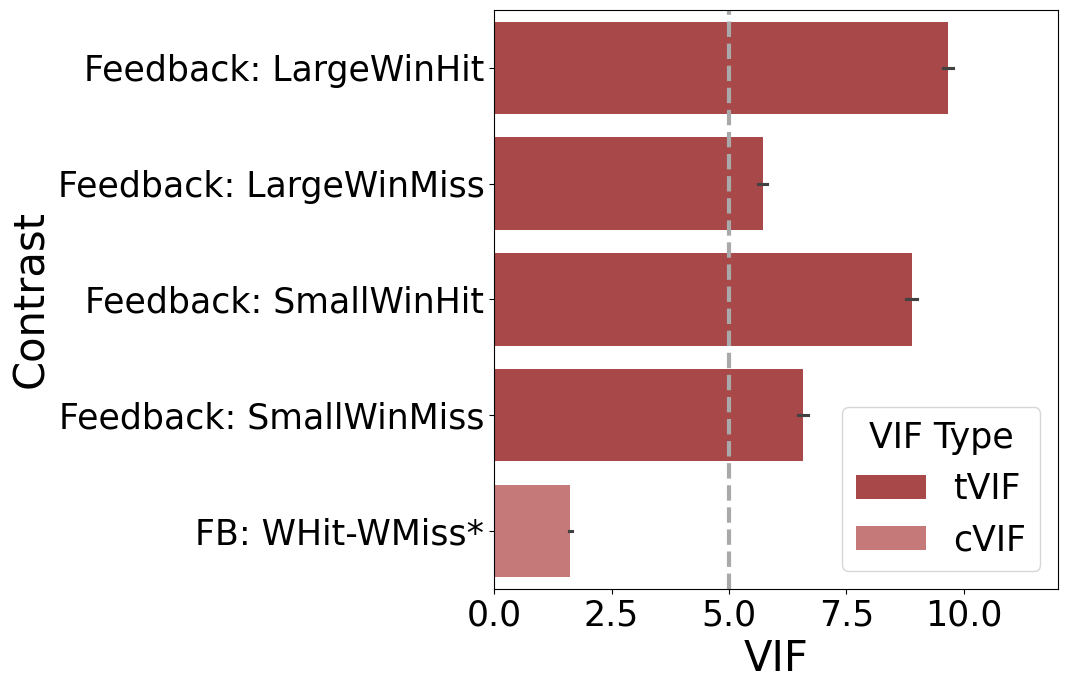

In [16]:
# Copy the data
vif_cond_comparisons = vif_plot.copy()
vif_cond_comparisons['Contrast'] = vif_cond_comparisons['Contrast'].astype(str)

# Filter relevant contrasts
vif_cond_comparisons = vif_cond_comparisons[
    vif_cond_comparisons['Contrast'].str.contains(
        'FB: WHit-WMiss*|Feedback: LargeWinHit|Feedback: SmallWinHit|Feedback: LargeWinMiss|Feedback: SmallWinMiss'
    )
]

# Filter to Saturated model only
vif_cond_comparisons = vif_cond_comparisons[
    vif_cond_comparisons['Model'] == 'Saturated'
]

# Add vif_type column
vif_cond_comparisons['vif_type'] = vif_cond_comparisons['Contrast'].apply(
    lambda x: 'cVIF' if x.startswith('FB: WHit-WMiss') else 'tVIF'
)

# Create filtered contrast order
filtered_contrasts = vif_cond_comparisons['Contrast'].unique()
order = [
    contrast for contrast in custom_contrast_order if contrast in filtered_contrasts
]

# Set custom color palette
# custom_palette = {
#     'tVIF': 'xkcd:golden yellow',
#     'cVIF': 'xkcd:moss green',
# }

# custom_palette = {
#     'tVIF': '#0E2841',
#     'cVIF': '#43848D',
# }

custom_palette = {
    'tVIF': 'firebrick',
    'cVIF': 'indianred',
}

# Plot
fig, ax = plt.subplots(1, 1, figsize=(11, 7))
sns.barplot(
    data=vif_cond_comparisons,
    y='Contrast',
    x='cVIF',
    hue='vif_type',
    order=order,
    palette=custom_palette,
    alpha=0.9,
)
plt.xlabel('VIF', fontsize=30)
plt.ylabel('Contrast', fontsize=30)
plt.axvline(x=5, color='darkgrey', linestyle='--', linewidth=3)
# plt.tick_params(axis='x', rotation=90)
plt.xlim(0, 12)
plt.legend(loc='lower right', title='VIF Type', fontsize=25, title_fontsize=25)
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.tight_layout()

# Save and show
fig_path = f'{figure_output_path}/vif_barplot_poster.pdf'
plt.savefig(fig_path)
plt.show()


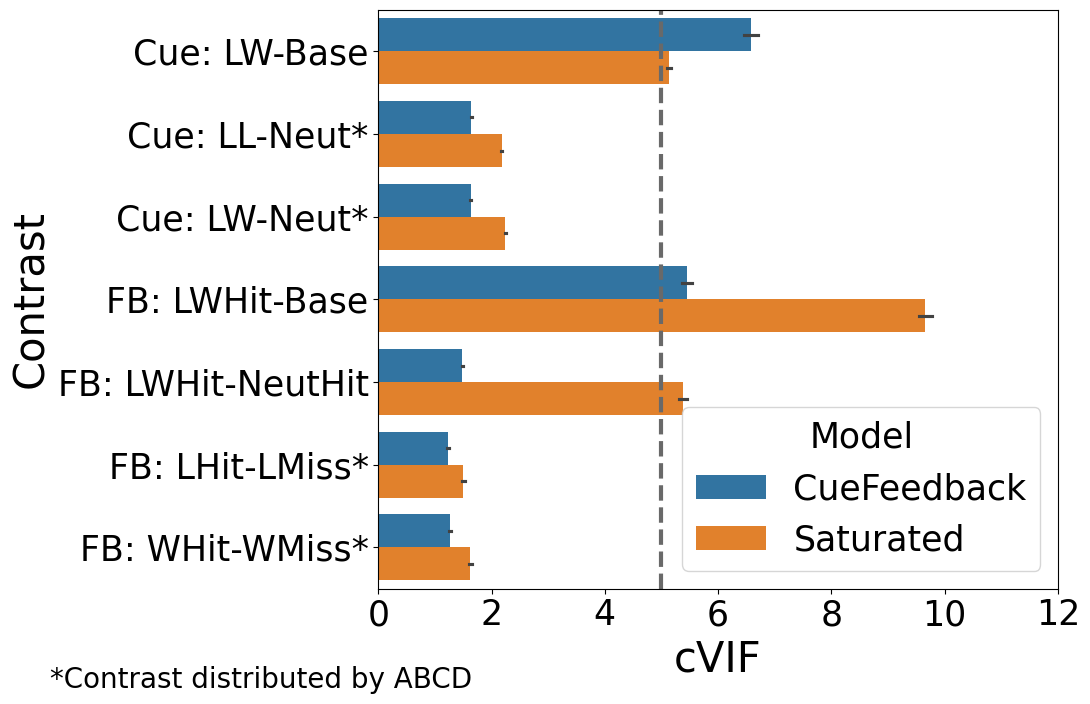

In [17]:
# For talk slides
vif_cond_comparisons = vif_plot.copy()
vif_cond_comparisons['Contrast'] = vif_cond_comparisons['Contrast'].astype(str)
vif_cond_comparisons = vif_cond_comparisons[
    vif_cond_comparisons['Contrast'].str.contains('-')
]

filtered_contrasts = vif_cond_comparisons['Contrast'].unique()
order = [
    contrast for contrast in custom_contrast_order if contrast in filtered_contrasts
]

fig_path = f'{figure_output_path}/vif_barplot_reduced.pdf'

fig = plt.subplots(1, 1, figsize=(11, 7))
hue_order = [f'{model}' for model in ['CueFeedback', 'Saturated']]
sns.barplot(
    data=vif_cond_comparisons,
    y='Contrast',
    x='cVIF',
    hue='Model',
    hue_order=hue_order,
    order=order,
)
plt.axvline(x=5, color='dimgrey', linestyle='--', linewidth=3)
plt.xlim(0, 12)
plt.ylabel('Contrast', fontsize=30)
plt.xlabel('cVIF', fontsize=30)
plt.legend(loc='lower right', title='Model', fontsize=25, title_fontsize=25)
plt.tick_params(axis='x')
plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.figtext(0.05, 0.01, '*Contrast distributed by ABCD', ha='left', fontsize=20)
plt.tight_layout()
plt.savefig(fig_path)
plt.show()

In [18]:
# Subset to Saturated and ABCD models
subset = vif_plot[vif_plot['Model'].isin(['Saturated', 'CueFeedback'])]

# Compute average cVIF grouped by Model and Contrast
avg_by_model_contrast = subset.groupby(['Model', 'Contrast'])['cVIF'].mean()

# Print the averages
print('Average cVIF by Model and Contrast:')
print(avg_by_model_contrast)

# Print the maximum of the grouped averages
print('\nMaximum average cVIF across Model-Contrast combinations:')
print(avg_by_model_contrast.max())


Average cVIF by Model and Contrast:
Model        Contrast               
CueFeedback  Cue: LL-Neut*               1.638527
             Cue: LW-Base                6.583701
             Cue: LW-Neut*               1.629737
             Cue: LargeLoss              6.544345
             Cue: LargeWin               6.583701
             Cue: Neutral                6.632020
             Cue: SmallLoss              6.466839
             Cue: SmallWin               6.407226
             FB: LHit-LMiss*             1.223313
             FB: LWHit-Base              5.454621
             FB: LWHit-NeutHit           1.484314
             FB: WHit-WMiss*             1.269949
             Feedback: LargeLossHit      5.104717
             Feedback: LargeLossMiss     3.895726
             Feedback: LargeWinHit       5.454621
             Feedback: LargeWinMiss      3.746688
             Feedback: NeutralHit        4.348268
             Feedback: NeutralMiss       4.719202
             Feedback: Smal

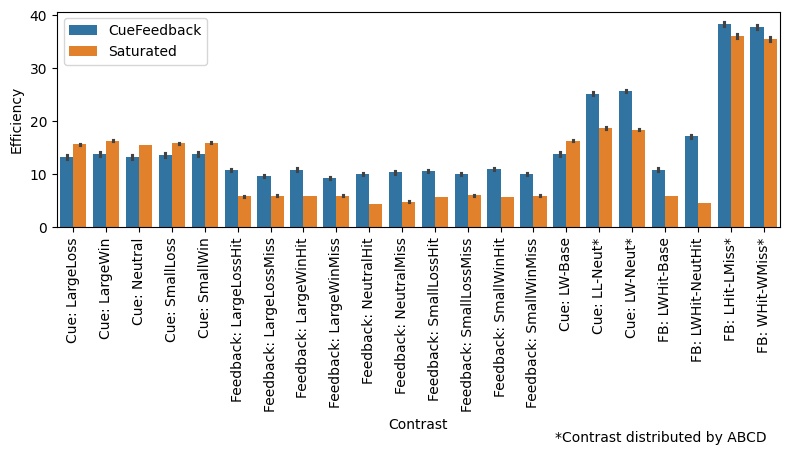

In [19]:
# eff_dat_no_cue_fix = eff_dat_plot.copy()
fig_path = f'{figure_output_path}/eff_barplot.pdf'

eff_trimmed = eff_dat_plot[
    ~eff_dat_plot['contrast'].str.contains('Fixation|Deriv|Probe')
]
eff_trimmed = eff_trimmed[~eff_trimmed['contrast'].str.contains('derivative|constant')]
eff_trimmed = eff_trimmed[~eff_trimmed['model'].str.contains('CueNoDeriv')]
eff_trimmed = eff_trimmed[eff_trimmed['Jitter'] == 'No Jitter']
eff_trimmed['model'] = eff_trimmed['model'].str.replace('CueYesDeriv', 'CueFeedback')
eff_trimmed = eff_trimmed.rename(
    {'model': 'Model', 'efficiency': 'Efficiency', 'contrast': 'Contrast'},
    axis=1,
)

eff_trimmed_not_cons = eff_trimmed[~eff_trimmed['Contrast'].str.contains('-')]

eff_trimmed_cons = eff_trimmed[eff_trimmed['Contrast'].str.contains('-')]
eff_trimmed_cons = eff_trimmed_cons.sort_values(by='Contrast')
eff_plot = pd.concat([eff_trimmed_not_cons, eff_trimmed_cons])
all_contrasts = eff_plot['Contrast'].unique()
custom_contrast_order = sorted(all_contrasts, key=contrast_sort_key)

hue_order = [f'{model}' for model in ['CueFeedback', 'Saturated']]


fig = plt.subplots(1, 1, figsize=(8, 4.5))
sns.barplot(
    data=eff_plot,
    x='Contrast',
    y='Efficiency',
    hue='Model',
    hue_order=hue_order,
    order=custom_contrast_order,
)
# plt.ylim(0,.01)
plt.legend(loc='upper left')
plt.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.figtext(0.7, 0.01, '*Contrast distributed by ABCD', ha='left', fontsize=10)
plt.savefig(fig_path)
plt.show()

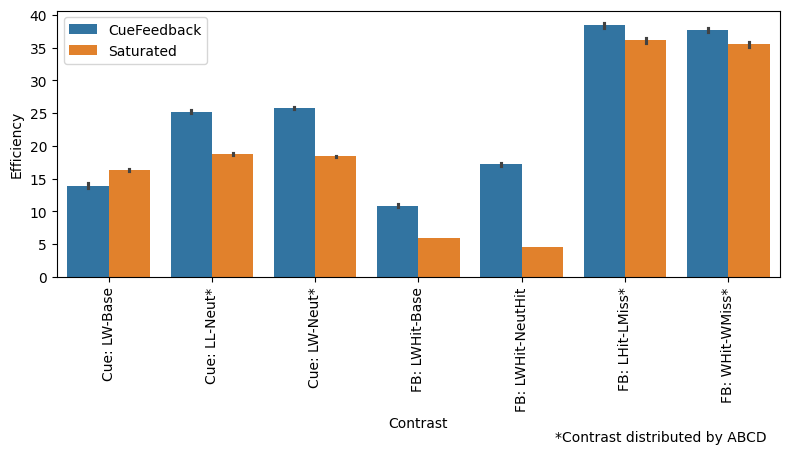

In [20]:
# For the talk slides
fig_path = f'{figure_output_path}/eff_barplot_reduced.pdf'

eff_cond_comparisons = eff_plot.copy()
eff_cond_comparisons['Contrast'] = eff_cond_comparisons['Contrast'].astype(str)
eff_cond_comparisons = eff_cond_comparisons[
    eff_cond_comparisons['Contrast'].str.contains('-')
]

filtered_contrasts = eff_cond_comparisons['Contrast'].unique()
order = [
    contrast for contrast in custom_contrast_order if contrast in filtered_contrasts
]


hue_order = [f'{model}' for model in ['CueFeedback', 'Saturated']]


fig = plt.subplots(1, 1, figsize=(8, 4.5))
sns.barplot(
    data=eff_cond_comparisons,
    x='Contrast',
    y='Efficiency',
    hue='Model',
    hue_order=hue_order,
    order=order,
)
# plt.ylim(0,.01)
plt.legend(loc='upper left')
plt.tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.figtext(0.7, 0.01, '*Contrast distributed by ABCD', ha='left', fontsize=10)
plt.savefig(fig_path)
plt.show()

In [21]:
mean_efficiency_saturated = (
    eff_trimmed[eff_trimmed['Model'] == 'Saturated']
    .groupby('Contrast')['Efficiency']
    .mean()
)
mean_efficiency_abcd = (
    eff_trimmed[eff_trimmed['Model'] == 'CueFeedback']
    .groupby('Contrast')['Efficiency']
    .mean()
)

print(mean_efficiency_saturated / mean_efficiency_abcd)
print(np.max(mean_efficiency_saturated / mean_efficiency_abcd))
print(np.min(mean_efficiency_saturated / mean_efficiency_abcd))

Contrast
Cue: LL-Neut*              0.742958
Cue: LW-Base               1.175047
Cue: LW-Neut*              0.714457
Cue: LargeLoss             1.182802
Cue: LargeWin              1.175047
Cue: Neutral               1.172800
Cue: SmallLoss             1.155831
Cue: SmallWin              1.150853
FB: LHit-LMiss*            0.941280
FB: LWHit-Base             0.543098
FB: LWHit-NeutHit          0.264233
FB: WHit-WMiss*            0.942299
Feedback: LargeLossHit     0.543884
Feedback: LargeLossMiss    0.621761
Feedback: LargeWinHit      0.543098
Feedback: LargeWinMiss     0.642735
Feedback: NeutralHit       0.436334
Feedback: NeutralMiss      0.468028
Feedback: SmallLossHit     0.535195
Feedback: SmallLossMiss    0.597711
Feedback: SmallWinHit      0.519351
Feedback: SmallWinMiss     0.592221
Name: Efficiency, dtype: float64
1.182801990496976
0.264232553222353


In [22]:
eff_trimmed

,Contrast,Efficiency,Model,Jitter,model_jitter
0,Cue: LargeLoss,13.849126,Saturated,No Jitter,Saturated (No Jitter)
1,Cue: LargeLoss,16.622797,Saturated,No Jitter,Saturated (No Jitter)
2,Cue: LargeLoss,14.196225,Saturated,No Jitter,Saturated (No Jitter)
3,Cue: LargeLoss,16.632955,Saturated,No Jitter,Saturated (No Jitter)
4,Cue: LargeLoss,15.207096,Saturated,No Jitter,Saturated (No Jitter)
...,...,...,...,...,...
18495,FB: LHit-LMiss*,49.221933,CueFeedback,No Jitter,CueYesDeriv (No Jitter)
18496,FB: LHit-LMiss*,43.451504,CueFeedback,No Jitter,CueYesDeriv (No Jitter)
18497,FB: LHit-LMiss*,36.628488,CueFeedback,No Jitter,CueYesDeriv (No Jitter)
18498,FB: LHit-LMiss*,43.217494,CueFeedback,No Jitter,CueYesDeriv (No Jitter)


In [23]:
mean_efficiency_saturated = (
    eff_trimmed[
        (eff_trimmed['Model'] == 'Saturated')
        & (eff_trimmed['Contrast'].str.contains('-'))
    ]
    .groupby('Contrast')['Efficiency']
    .mean()
)

mean_efficiency_abcd = (
    eff_trimmed[
        (eff_trimmed['Model'] == 'CueFeedback')
        & (eff_trimmed['Contrast'].str.contains('-'))
    ]
    .groupby('Contrast')['Efficiency']
    .mean()
)
print(mean_efficiency_saturated / mean_efficiency_abcd)
print(np.max(mean_efficiency_saturated / mean_efficiency_abcd))
print(np.min(mean_efficiency_saturated / mean_efficiency_abcd))

Contrast
Cue: LL-Neut*        0.742958
Cue: LW-Base         1.175047
Cue: LW-Neut*        0.714457
FB: LHit-LMiss*      0.941280
FB: LWHit-Base       0.543098
FB: LWHit-NeutHit    0.264233
FB: WHit-WMiss*      0.942299
Name: Efficiency, dtype: float64
1.1750468113088905
0.264232553222353
